In [8]:
import numpy as np
import matplotlib.pyplot as plt
def geometric_arrival(rate):
    """
    Generate inter-arrival times from a geometric distribution.
    """
    return np.random.geometric(rate)

def geometric_service(rate):
    """
    Generate service times from a geometric distribution.
    """
    return np.random.geometric(rate)

In [18]:
def single_server_queue(arrival_rate, service_rate, num_time_slots):
    """
    Simulate a single server queue.
    """
    clock = 0
    arrival_time = geometric_arrival(arrival_rate)
    departure_time = geometric_service(service_rate)
    queue_length = 0
    total_queue_length = 0
    total_waiting_time = 0
    #customers_served = 0

    while clock < num_time_slots:

        # arrivals
        if arrival_time < departure_time:
            clock = arrival_time
            
            arrival_time = clock + geometric_arrival(arrival_rate)
            
            if queue_length == 0:
                # total_waiting_time += max(departure_time - arrival_time, 0)
                departure_time = clock + geometric_service(service_rate)

            queue_length += 1

        # departures
        elif departure_time < arrival_time:
            clock = departure_time

            #customers_served += 1

            if queue_length > 0:
                # total_waiting_time += max(departure_time - arrival_time, 0)
                departure_time = clock + geometric_service(service_rate)
                queue_length -= 1
            else:
                departure_time = float('inf')

        else: # depart = arrival time, dont change len of q
            clock = departure_time 
            arrival_time = clock + geometric_arrival(arrival_rate)
            departure_time = clock + geometric_service(service_rate)

        total_queue_length += queue_length

    average_queue_length = total_queue_length / num_time_slots
    return average_queue_length #, average_waiting_time

In [45]:
# Parameters
ars = [0.2, 0.4, 0.5, 0.6, 0.7, 0.72, 0.74, 0.745]
sr = 0.75
N = 5 * 10**6

aqll = []

for ar in ars:
    avg_q_len = single_server_queue(ar, sr, N)
    aqll.append(avg_q_len)


# theoretical results
p = []
t = np.linspace(ars[0], ars[-1], 100)
for ar in t: # one liner here would look really messy :p
    alpha = ar / ((1-ar) * sr)
    beta = (ar * (1-sr)) / ((1-ar)*sr)
    E = alpha / ( (1 - beta) * (1 + alpha - beta) )
    p.append(E)


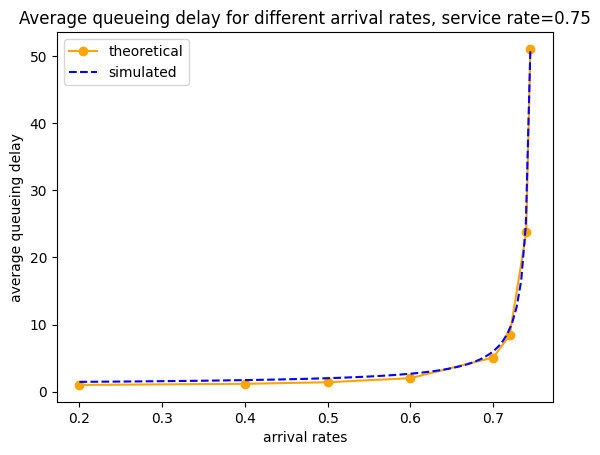

In [48]:

aqdl = [aqll[i]/ars[i] for i in range(len(ars))]
taqdl = [p[i]/ar for i, ar in enumerate(t)]

plt.figure()
plt.plot(ars, aqdl, color='orange',  marker='o', linestyle='-')
plt.plot(t, taqdl, 'b--')
plt.legend(['theoretical', 'simulated'])
plt.title('Average queueing delay for different arrival rates, service rate=0.75')
plt.xlabel('arrival rates')
plt.ylabel('average queueing delay')
plt.show()

